In [1]:
import wave
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os
import librosa

# Load the wav file using scipy


In [2]:
def wav_to_pcm_librosa(wav_file, sample_rate=44100):
    # Load the wav file using librosa
    data, sr = librosa.load(wav_file, sr=sample_rate, mono=True)  # Downmix to mono
    
    # Normalize and convert to 16-bit PCM format
    pcm_data = np.int16(data / np.max(np.abs(data)) * 32767)  # Scaling to 16-bit
    return pcm_data
    
    # Save to PCM file
    # pcm_data.tofile(pcm_file)
    # print(f"PCM file saved as {pcm_file}")

In [ ]:
# Convert Here .wav to .pcm

In [3]:
def Get_Spectogram_Values(pcm_data):
    sample_rate = 16000  # or the actual sample rate of your file
    bit_depth = 16       # bits per sample (16 for standard PCM)
    n_channels = 1 
    # with open(pcm_path, 'rb') as pcmfile:
    #     pcm_data = np.frombuffer(pcmfile.read(), dtype=np.int16)
    audio_data = pcm_data.astype(np.float32) / np.iinfo(np.int16).max

    # mel_spec = np.mean(librosa.feature.melspectrogram(y=audio_data, sr=sample_rate).T, axis=0)
    mel_spec = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate).T
    # mel_spec = mel_spec[:120]
    return mel_spec

In [10]:
def plot_mel_features(mel_spec):
    spec_val = mel_spec
    mel_spectrogram_db = librosa.power_to_db(spec_val, ref=np.max)
    average_energy = np.mean(mel_spectrogram_db, axis=0)  # Average over the frequency axis
    
    # Plot the average energy as a line plot
    plt.figure(figsize=(12, 4))
    plt.plot(average_energy, color='blue', linewidth=1.5)  # Line plot with blue color
    plt.title("Average Mel Spectrogram Energy Over Time")
    plt.xlabel("Normal_2")
    plt.ylabel("Average Energy (dB)")
    plt.grid(visible=True, linestyle='--', alpha=0.5)  # Add a light grid for better readability
    plt.tight_layout()  # Adjust layout to fit the plot nicely
    plt.show()

In [8]:
def Get_and_Plot(PCM_Data):
    # path = f"BG_PCM/{pcm_path}"
    spec_val = Get_Spectogram_Values(PCM_Data)
    plot_mel_features(spec_val)

In [6]:
pcm_data = wav_to_pcm_librosa('normal_11.wav')

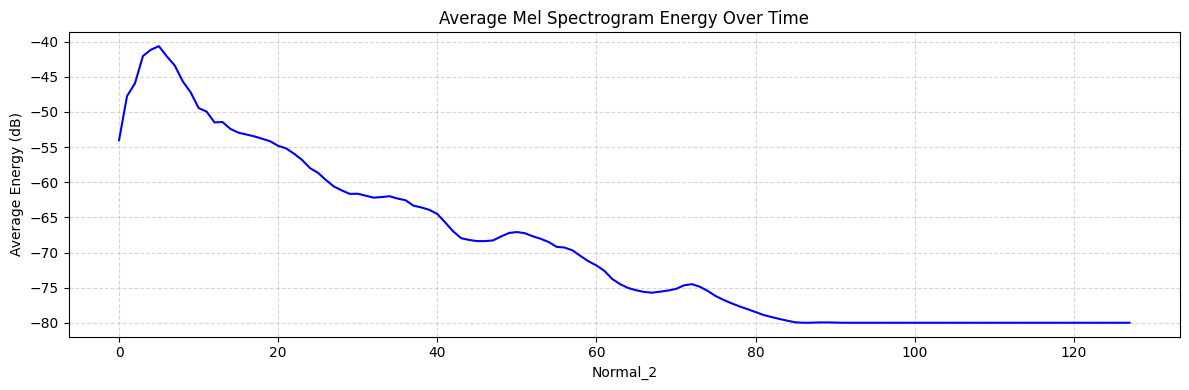

In [11]:
Get_and_Plot(pcm_data)